In [28]:
def explained_variance(X,xt):
    x_v=np.var(a=X,axis=0)
    Var_x=np.sum(x_v)
    xt_v=np.var(a=xt,axis=0)
    Exp_var=xt_v/Var_x
    print('Explained variance of each feature is: ', Exp_var)

In [2]:
from sklearn.manifold import Isomap as im
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DT # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB as nbc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import (train_test_split, learning_curve, cross_val_score, cross_val_predict, 
ShuffleSplit, KFold, cross_validate)
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier as MLP

In [29]:
df = pd.read_csv("Datasets/D5.csv")
print("shape of the dataset", df.shape)

shape of the dataset (34999, 355)


In [36]:
def get_dataset():
    X = df.iloc[:, :-1]
    y = df.iloc[: , -1]
    return X, y

X,y=get_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

In [37]:
isomap=im(n_neighbors=5, n_components=2)
xt=isomap.fit(X_train,y_train).transform(X_train)


MemoryError: Unable to allocate 584. MiB for an array with shape (8749, 8749) and data type float64

In [27]:
# explained variance of each feature
explained_variance(X_train,xt)

Explained variance of each feature is:  [3.57834179 2.87069771 1.71335637]


In [39]:
def get_model():
    models = list()
#     models.append(nbc())
    models.append(make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear')))
#     models.append(DT())
#    models.append(MLP(hidden_layer_sizes=(256,128), activation='relu', solver='adam', alpha=0.005, max_iter=100, shuffle=True, random_state=None, verbose=False))
    return models
 
def evaluate_model(cv, model):
    X, y = get_dataset()  # get the dataset
#     model = get_model()  # get the model
    scoring = {'accuracy': make_scorer(accuracy_score),
               'f1_score': make_scorer(f1_score, average='weighted')}
    # evaluate the model
    scores = cross_validate(model, xt, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores

folds = range(2, 12)
models = get_model()  # get the model
accList, fscoreList = list(), list()

for model in models:
    print("Results for model = ", model)
    for k in folds:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
        score = evaluate_model(cv, model)
        accuracy = np.mean(score['test_accuracy'])
        accList.append(accuracy)
        f1 = np.mean(score['test_f1_score'])
        fscoreList.append(f1)
        print('> folds=', k-1, ', accuracy =', round(accuracy,3), ', F1_score =', round(f1,3))


Results for model =  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])


ValueError: Found input variables with inconsistent numbers of samples: [17499, 34999]

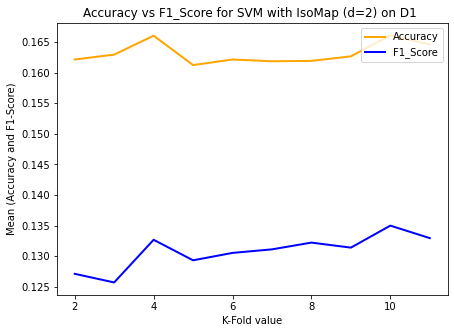

In [13]:
fig, ax = pyplot.subplots(figsize=(7,5))

ax.plot(folds, accList, color='orange', label="Accuracy", linewidth=2)
ax.plot(folds, fscoreList, color='blue', label="F1_Score", linewidth=2)
# ax.set_ylim(ymin=.3, ymax=.5)
ax.set_title('Accuracy vs F1_Score for SVM with IsoMap (d=2) on D1 ')
ax.set_xlabel('K-Fold value')
ax.set_ylabel('Mean (Accuracy and F1-Score)')
ax.legend(loc="upper right")

# show the plot
pyplot.show()